In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
import pyodbc

In [3]:
sql_conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-5K5KVSQ\SQLEXPRESS;DATABASE=Ensemble;Trusted_Connection=yes') 

In [4]:
query1= "SELECT * FROM Churn_1"

In [5]:
query2= "SELECT * FROM Churn_2"

In [6]:
df1= pd.read_sql(query1, sql_conn)

In [7]:
df2= pd.read_sql(query2, sql_conn)

In [8]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False


In [9]:
df1.shape

(7043, 10)

In [10]:
df2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [11]:
df2.shape

(7043, 11)

In [12]:
df=pd.merge(df1, df2, left_index=True, right_index=True, how="inner") #final dataframe

In [13]:
df.shape

(7043, 21)

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,True
6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,False
7,6713-OKOMC,Female,False,False,False,10,False,None,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
8,7892-POOKP,Female,False,True,False,28,True,True,Fiber optic,False,...,True,True,True,True,Month-to-month,True,Electronic check,104.800003,3046.050049,True
9,6388-TABGU,Male,False,False,True,62,True,False,DSL,True,...,False,False,False,False,One year,False,Bank transfer (automatic),56.150002,3487.949951,False


2. Data cleansing: [ Score: 10 point ]
• Missing value treatment
• Convert categorical attributes to continuous using relevant functional knowledge
• Drop attribute/s if required using relevant functional knowledge
• Automate all the above steps


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   bool   
 4   Dependents        7043 non-null   bool   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   bool   
 7   MultipleLines     6361 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   bool   


In [17]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
df['MultipleLines'].unique() # no phone line is considered as null in sql db so it was turned into none

array([None, False, True], dtype=object)

In [19]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
df['OnlineSecurity'].unique()

array([False, True, None], dtype=object)

In [21]:
df['OnlineBackup'].unique()

array([True, False, None], dtype=object)

In [22]:
df['DeviceProtection'].unique()

array([False, True, None], dtype=object)

In [23]:
df['TechSupport'].unique()

array([False, True, None], dtype=object)

In [24]:
df['StreamingTV'].unique()

array([False, True, None], dtype=object)

In [25]:
df['StreamingMovies'].unique()

array([False, True, None], dtype=object)

In [26]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [27]:
df.isnull().sum()#checking whether dataset has null values and getting count of null values if any

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        682
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
dtype: int64

In [28]:
df.replace({False: 0, True: 1,None:0}, inplace=True) #replace t/F values into 0/1 and considered none as false so replaced it with 0

In [29]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.850000,29.850000,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.950001,1889.500000,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.299999,1840.750000,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.699997,151.649994,1


In [30]:
df['StreamingTV'].unique()

array([0, 1], dtype=int64)

In [31]:
df.isnull().sum()#checking whether dataset has null values and getting count of null values if any

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
#handling null values and replacing null values by 0
df=df.fillna(0)

In [33]:
df.isnull().sum()#checking whether dataset has null values and getting count of null values if any

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


# No null values found

In [35]:
df=df.iloc[:,1:] #selecting all columns excluding customerid

 3. Data analysis & visualisation: [ Score: 10 point ]
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

In [36]:
#statistical Analysis
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794471,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.549988,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.349998,1394.550049,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.849998,3786.599976,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.799805,1.000000


In [37]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Univariate Analysis

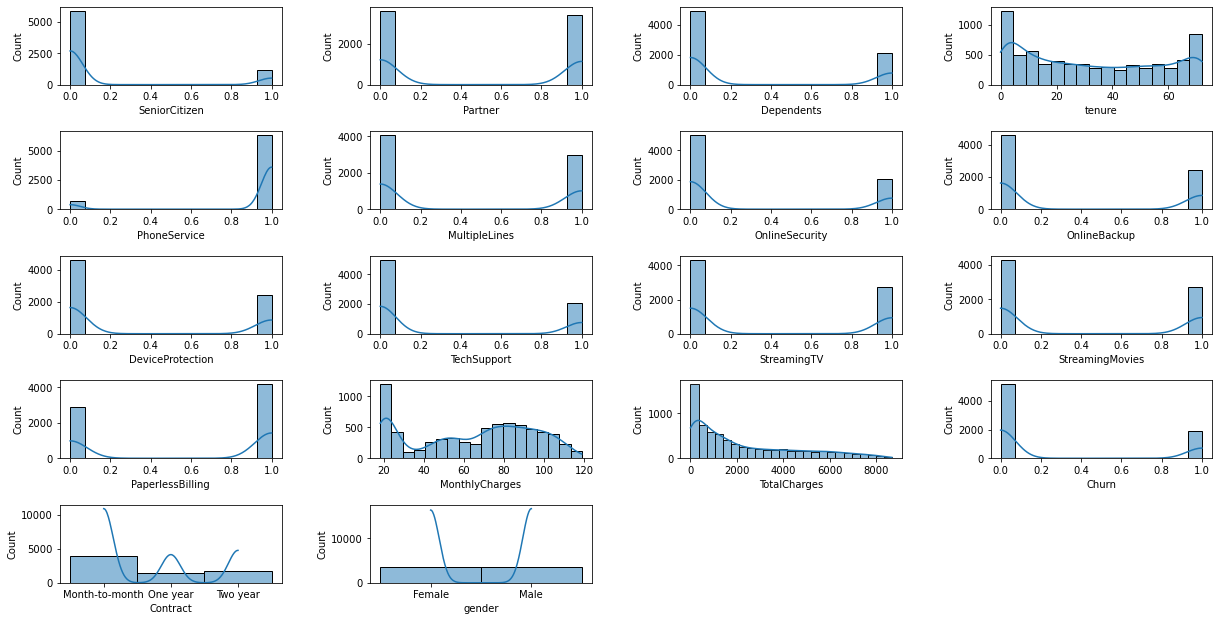

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(5,4,1)
sns.histplot(df,x='SeniorCitizen',kde=True)
plt.subplot(5,4,2)
sns.histplot(df,x='Partner',kde=True )
plt.subplot(5,4,3)
sns.histplot(df,x='Dependents' ,kde=True )
plt.subplot(5,4,4)
sns.histplot(df,x='tenure' ,kde=True )
plt.subplot(5,4,5)
sns.histplot(df,x='PhoneService' ,kde=True )
plt.subplot(5,4,6)
sns.histplot(df,x='MultipleLines' ,kde=True )
plt.subplot(5,4,7)
sns.histplot(df,x='OnlineSecurity' ,kde=True )
plt.subplot(5,4,8)
sns.histplot(df,x='OnlineBackup' ,kde=True )
plt.subplot(5,4,9)
sns.histplot(df,x='DeviceProtection' ,kde=True )
plt.subplot(5,4,10)
sns.histplot(df,x='TechSupport' ,kde=True )
plt.subplot(5,4,11)
sns.histplot(df,x='StreamingTV' ,kde=True )
plt.subplot(5,4,12)
sns.histplot(df,x='StreamingMovies' ,kde=True )
plt.subplot(5,4,13)
sns.histplot(df,x='PaperlessBilling' ,kde=True )
plt.subplot(5,4,14)
sns.histplot(df,x='MonthlyCharges' ,kde=True )
plt.subplot(5,4,15)
sns.histplot(df,x='TotalCharges' ,kde=True )
plt.subplot(5,4,16)
sns.histplot(df,x='Churn' ,kde=True )

plt.subplot(5,4,17)
sns.histplot(df,x='Contract' ,kde=True )
plt.subplot(5,4,18)
sns.histplot(df,x='gender' ,kde=True )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

plt.show()

<AxesSubplot:xlabel='PaymentMethod', ylabel='Count'>

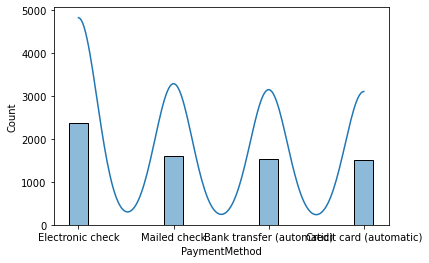

In [39]:

sns.histplot(df,x='PaymentMethod',kde=True, shrink=.2 )

# Conclusions:
    
    1.Around 500 users are senior citizen.
    
    2.A ratio of users having partners or no partners are mostly equal.
    
    3.Maximum no of users have no dependents and around 2000 users has dependents.
    
    4.Maximum no of users are customers about 5 years.
    
    5.Maximum no of users availed phone service.
    
    6.Maximum no of users dont have multiple lines.
    
    7.Maximum no of users dont have online security.
    
    8.Maximum no of users dont have online backup.
    
    9.Maximum no of users dont have device protection.
    
    10.Maximum no of users didn't availed techsupport.
    
    11.Maximum no of users dont have streaming tv service.
    
    12.Maximum no of users dont have streaming movie service.
    
    13.Maximum no of users availed paperless billing service.
    
    14.Maximum no of users charged monthly around 20.
    
    15.Maximum no of users charged in total around 1000.
    
    16.Maximum no of users availed month-month contract.
    
    17.Ratio of female and male users is equal.
    
    18.Maximum no of users prefers Electronic check as payment method.
    
    19.Nearly 2000 users are churned.

# Bivariate Analysis

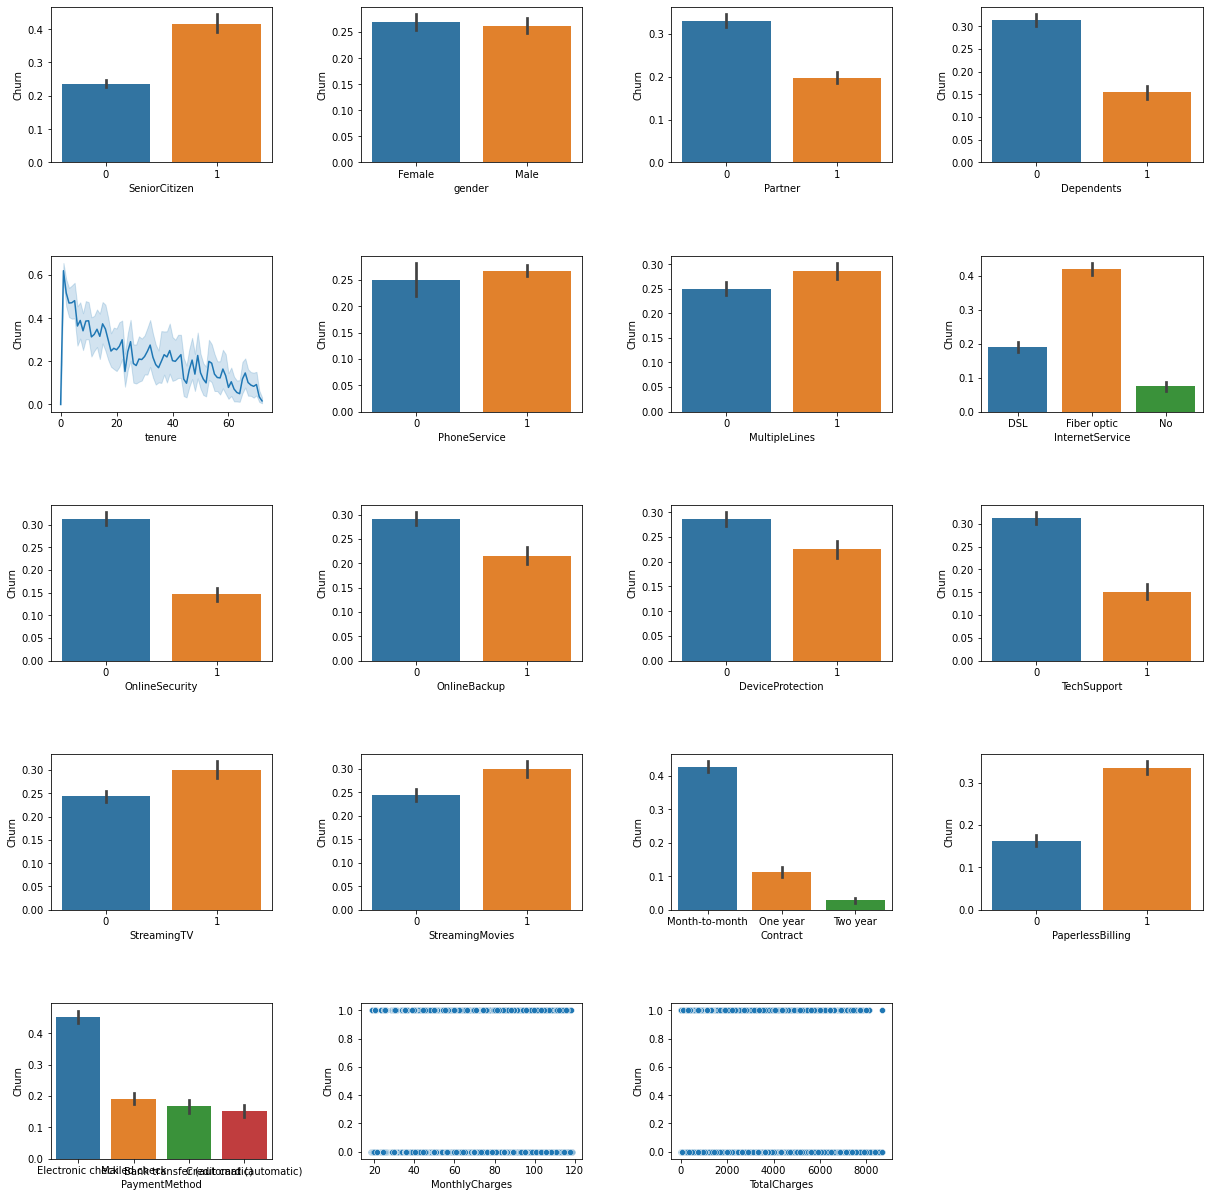

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(5,4,1)
sns.barplot(data=df,x='SeniorCitizen',y='Churn')
plt.subplot(5,4,2)
sns.barplot(data=df,x='gender',y='Churn')
plt.subplot(5,4,3)
sns.barplot(data=df,x='Partner' ,y='Churn')
plt.subplot(5,4,4)
sns.barplot(data=df,x='Dependents' ,y='Churn')
plt.subplot(5,4,5)
sns.lineplot(data=df,x='tenure' ,y='Churn')
plt.subplot(5,4,6)
sns.barplot(data=df,x='PhoneService' ,y='Churn')
plt.subplot(5,4,7)
sns.barplot(data=df,x='MultipleLines' ,y='Churn')
plt.subplot(5,4,8)
sns.barplot(data=df,x='InternetService' ,y='Churn')
plt.subplot(5,4,9)
sns.barplot(data=df,x='OnlineSecurity' ,y='Churn')
plt.subplot(5,4,10)
sns.barplot(data=df,x='OnlineBackup',y='Churn')
plt.subplot(5,4,11)
sns.barplot(data=df,x='DeviceProtection',y='Churn')
plt.subplot(5,4,12)
sns.barplot(data=df,x='TechSupport',y='Churn')
plt.subplot(5,4,13)
sns.barplot(data=df,x='StreamingTV',y='Churn')
plt.subplot(5,4,14)
sns.barplot(data=df,x='StreamingMovies',y='Churn')
plt.subplot(5,4,15)
sns.barplot(x='Contract',y='Churn',data=df)
plt.subplot(5,4,16)
sns.barplot(data=df,x='PaperlessBilling',y='Churn')
plt.subplot(5,4,17)
sns.barplot(data=df,x='PaymentMethod',y='Churn')
plt.subplot(5,4,18)
sns.scatterplot(data=df,x='MonthlyCharges',y='Churn')
plt.subplot(5,4,19)
sns.scatterplot(data=df,x='TotalCharges',y='Churn')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

# Conclusions:
    
    
    1.40% of churned users are senior citizen.
    
    2.25% of users irrespective of genders are churned.
    
    3.More than 30% of churned users don't have partners.
    
    4.More than 30% of churned users don't have dependents.
    
    5.More than 60% of churned users have tenure around 5-10 yrs.
    
    6.More than 25% of churned users  have phone service .
    
    7.More than 25% of churned users  have multiple lines service .
    
    8.40% of churned users availed fiber optics internet service.
    
    9.More than 30% of churned users don't have online security.
    
    10.More than 30% of churned users don't have online backup.
    
    11.More than 25% of churned users don't have device protection.
    
    12.More than 30% of churned users don't have tech support.
    
    13.30% of churned users availed streaming tv service.
    
    14.30% of churned users availed streaming movie service.
    
    15.More than 40% of churned users availed month-month contract.
    
    16.More than 30% of churned users  have availed paperless billing.
    
    17.More than 40% of churned users used electronic check as payment method.
    
   

# Multivariant Analysis

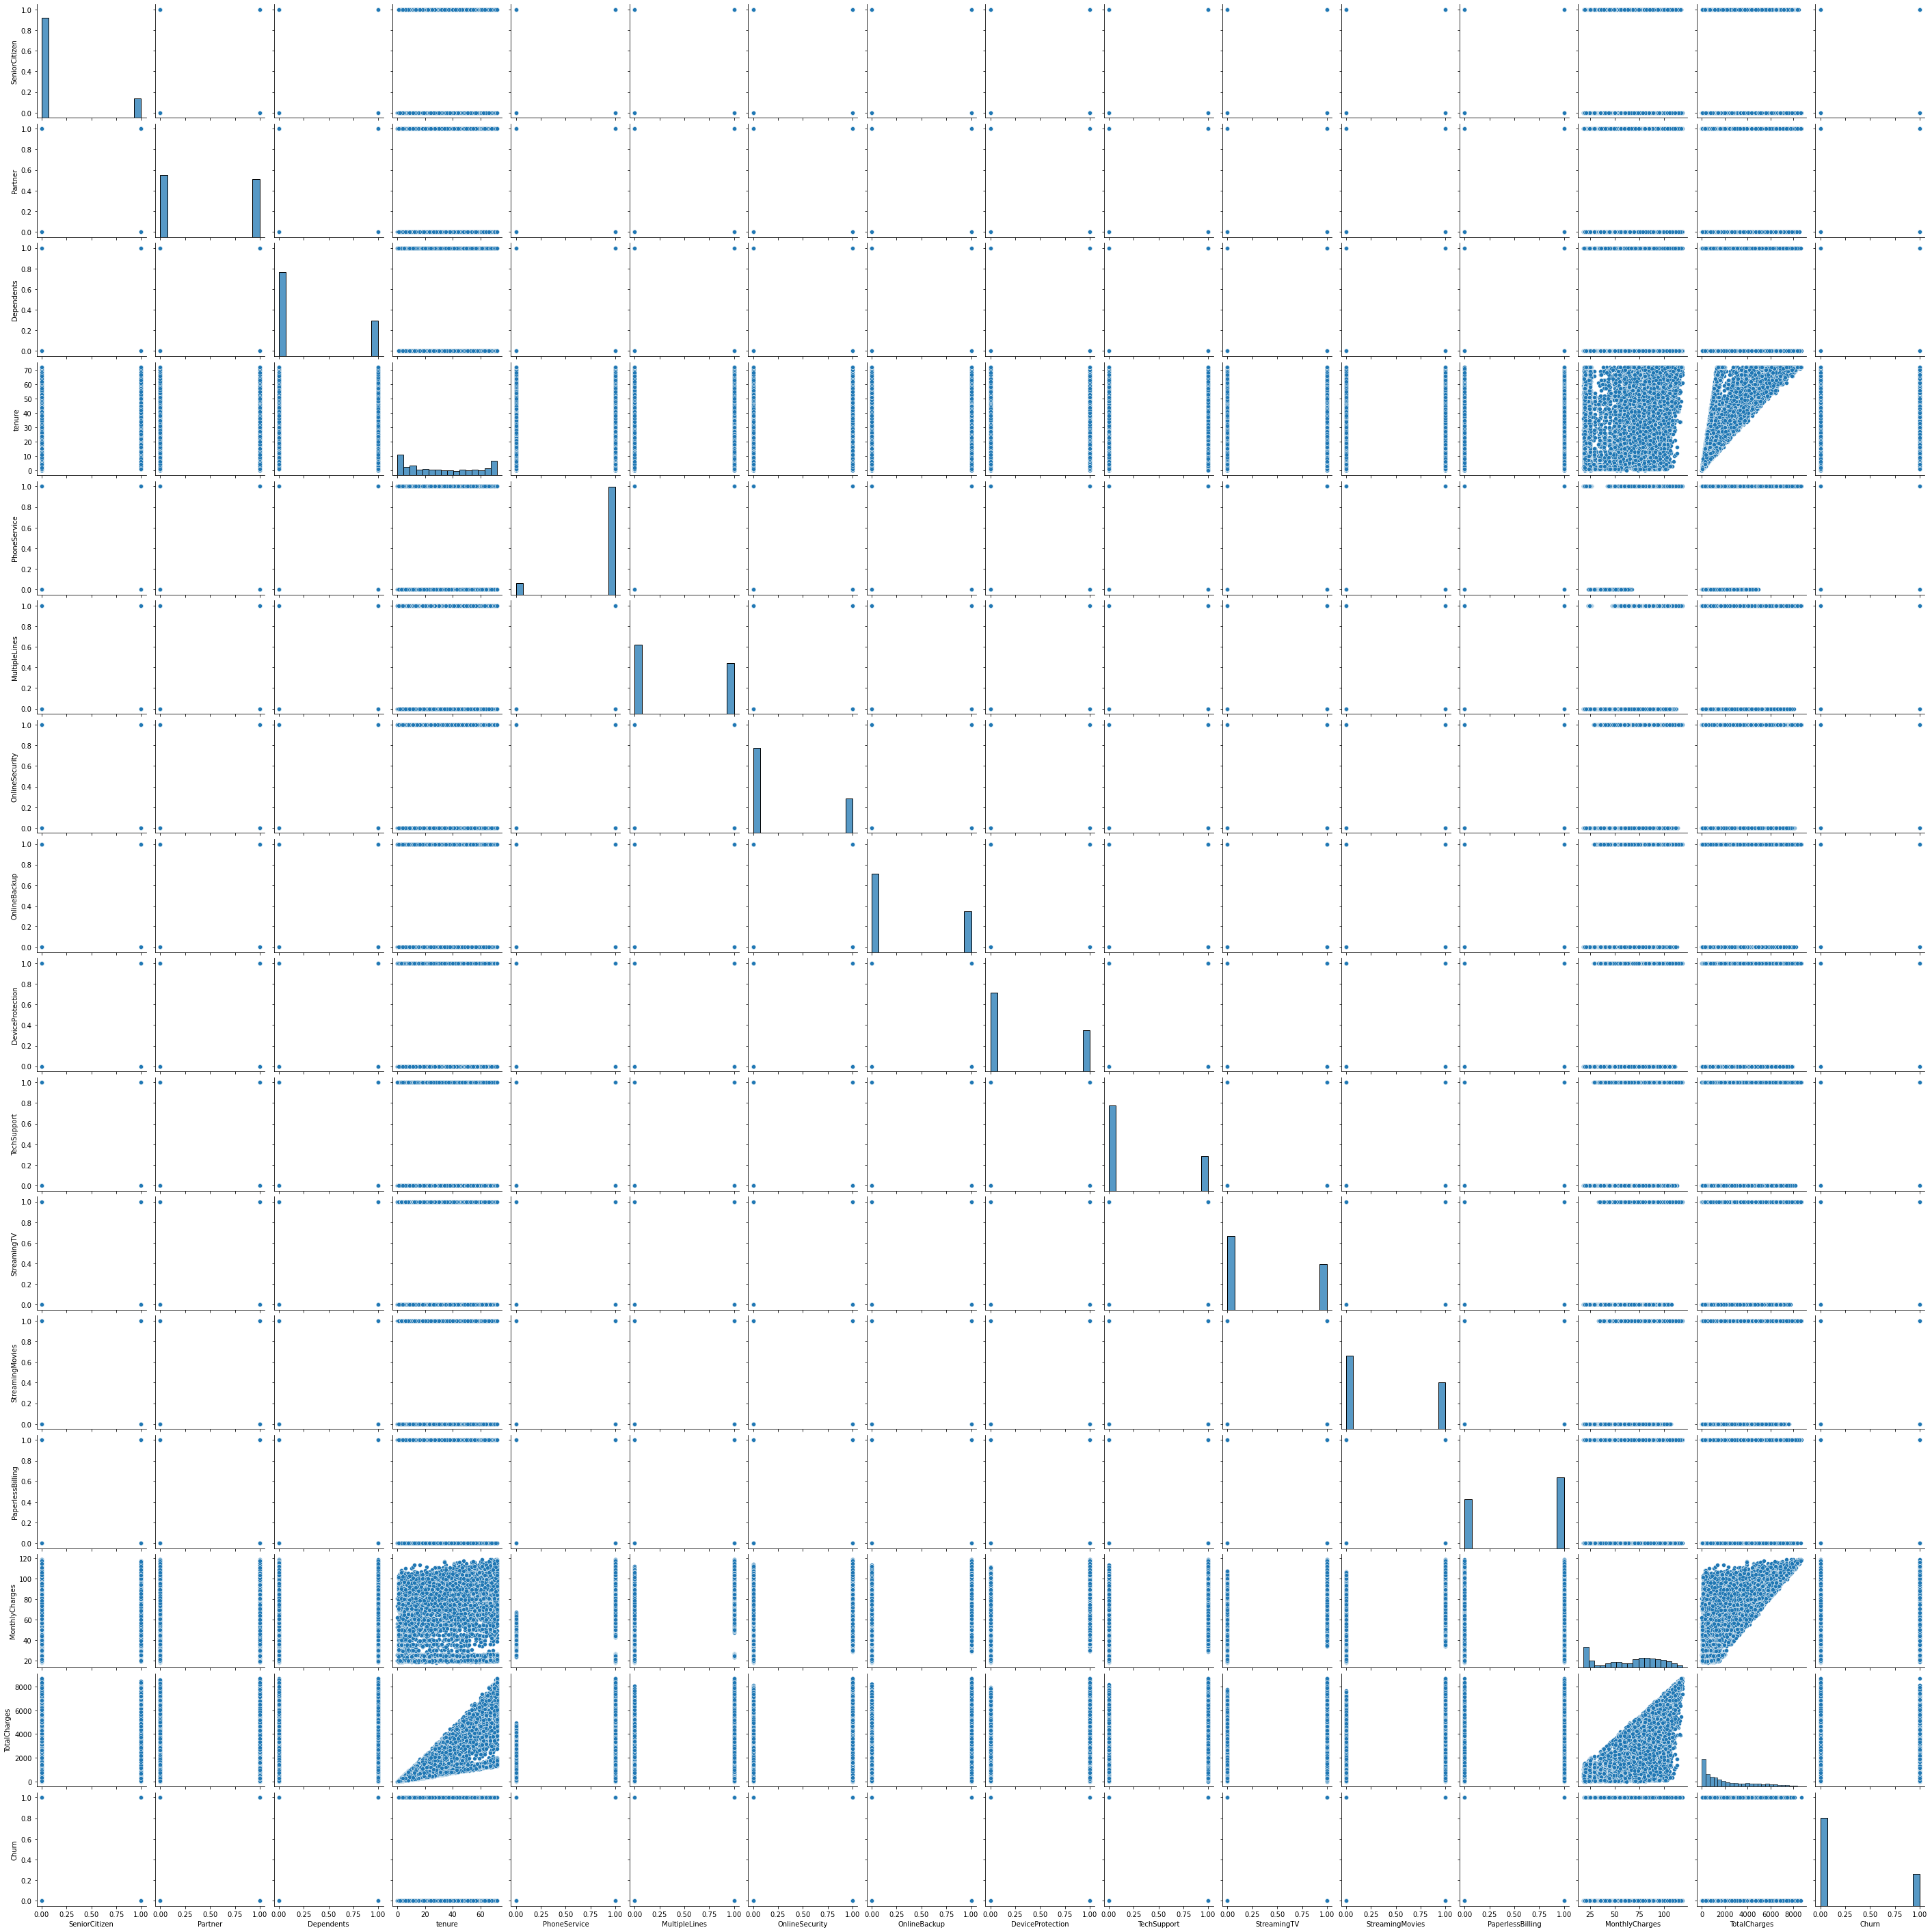

In [41]:
sns.pairplot(df)

<AxesSubplot:>

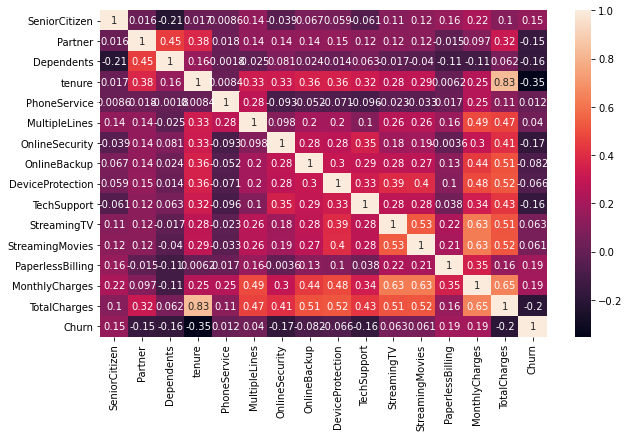

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

# Dealing with categorical value

In [43]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [44]:
df=pd.get_dummies(df, columns = ['PaymentMethod','InternetService','Contract','gender'],drop_first=True)

In [45]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,gender_Male
0,0,1,0,1,0,0,0,1,0,0,...,29.850000,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1889.500000,0,0,0,1,0,0,1,0,1
2,0,0,0,2,1,0,1,1,0,0,...,108.150002,1,0,0,1,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1840.750000,0,0,0,0,0,0,1,0,1
4,0,0,0,2,1,0,0,0,0,0,...,151.649994,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,1990.500000,0,0,0,1,0,0,1,0,1
7039,0,1,1,72,1,1,0,1,1,0,...,7362.899902,0,1,0,0,1,0,1,0,0
7040,0,1,1,11,0,0,1,0,0,0,...,346.450012,0,0,1,0,0,0,0,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,306.600006,1,0,0,1,1,0,0,0,1


In [46]:
y=df.pop('Churn')#target

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   MultipleLines                          7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   OnlineBackup                           7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

In [48]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year', 'gender_Male'],
      dtype='object')

4. Data pre-processing: [ Score: 5 point ]
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split.
• Check if the train and test data have similar statistical characteristics when compared with original data

In [49]:
X=df.iloc[:,:] #Predictors

In [50]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year', 'gender_Male'],
      dtype='object')

In [51]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [52]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

We can find an target imbalance in ratio of 0 and 1

In [53]:
from sklearn.model_selection import train_test_split



# split into train and test
#There is a possibilty that there is a imbalance when we split  train and test ,the either dataset may have bias towards single category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [54]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
y_pred=dTree.predict(X_test)

In [55]:

print(accuracy_score(y_test,y_pred))

0.7437899219304471


# Visualising decision tree

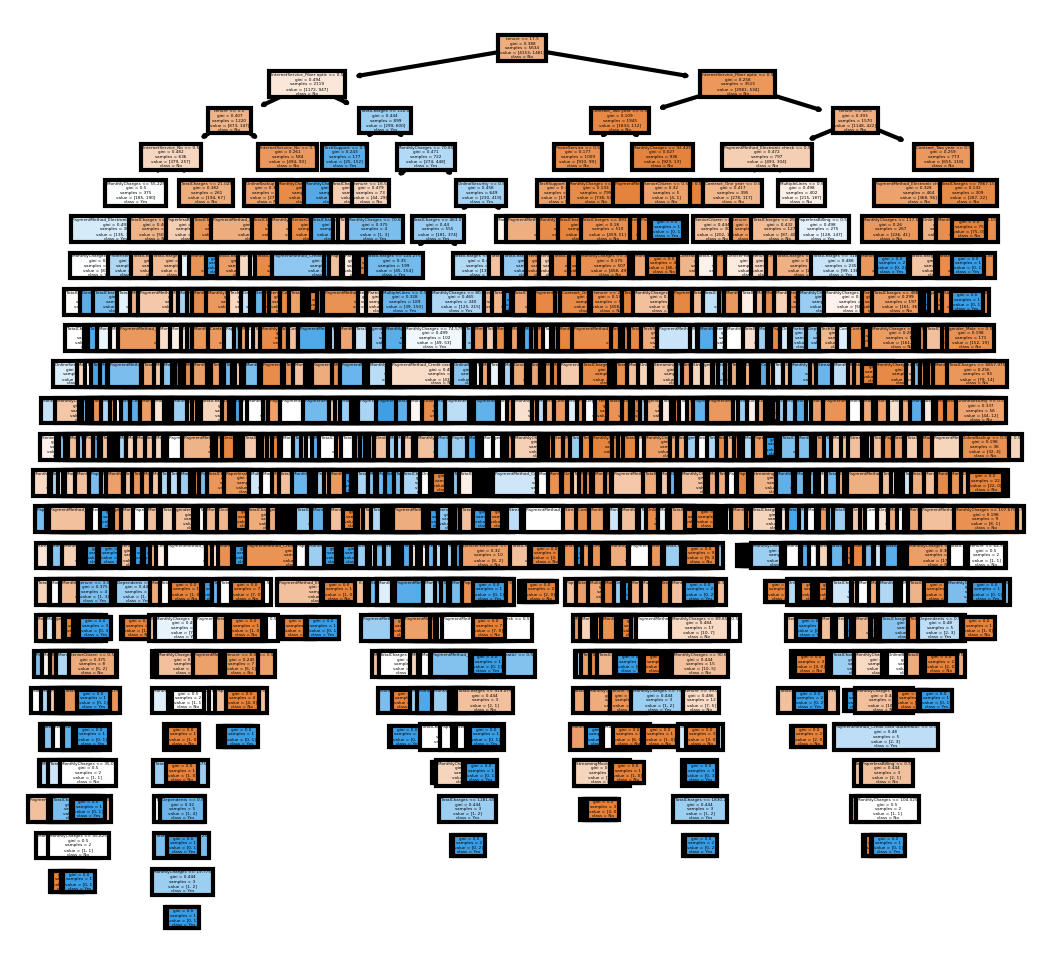

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

#we can see oversampling

# Handling target imbalance

In [57]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [58]:
X_resampled.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year', 'gender_Male'],
      dtype='object')

In [59]:
y_resampled.value_counts()

0    4153
1    4153
Name: Churn, dtype: int64

In [60]:
dTree.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=1)

In [61]:
print(accuracy_score(y_test,y_pred))

0.7437899219304471


There is no impact after target balancing

5. Model training, testing and tuning: [ Score: 25 point ]
• Train and test all ensemble models taught in the learning module.
• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
• Display the classification accuracies for train and test data.
• Apply all the possible tuning techniques to train the best model for the given data. 
• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 
• Display and compare all the models designed with their train and test accuracies.
• Select the final best trained model along with your detailed comments for selecting this model. 
• Pickle the selected model for future use.

In [62]:
# Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
y_pred=dTreeR.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7906316536550745


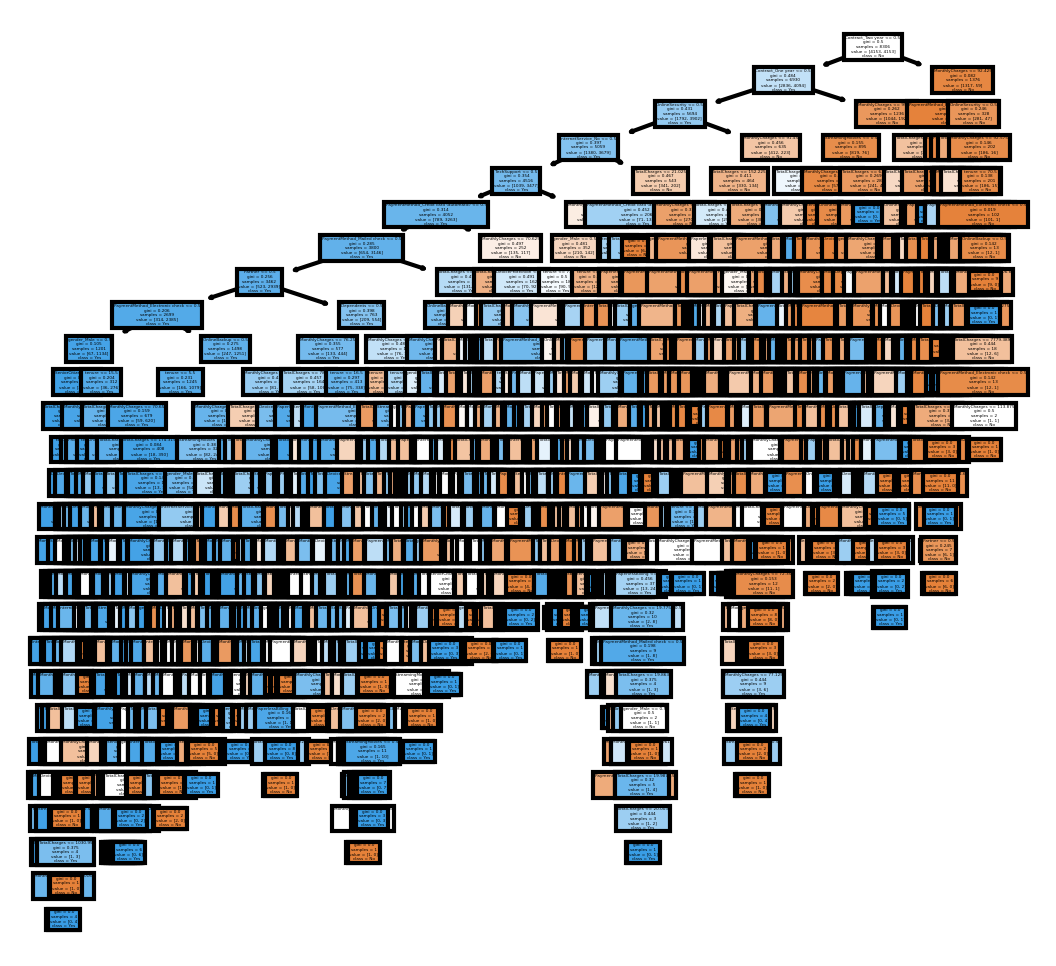

In [63]:
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [64]:
# Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_resampled, y_resampled)
y_pred=dTreeR.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.6941092973740242


0.6941092973740242


<AxesSubplot:>

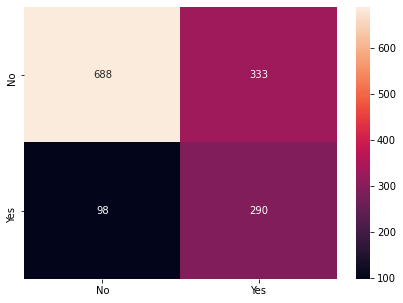

In [65]:
from sklearn.metrics import confusion_matrix


y_predict = dTreeR.predict(X_test)

print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - Bagging

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

0.8090844570617459


<AxesSubplot:>

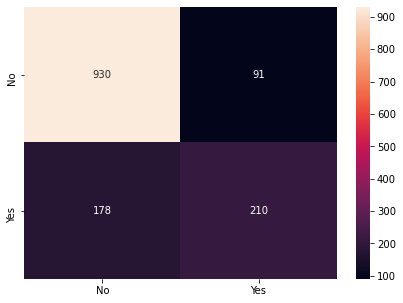

In [67]:

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=logreg, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgc = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)

print(accuracy_score(y_test,y_predict))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

For resampled data

0.8090844570617459


<AxesSubplot:>

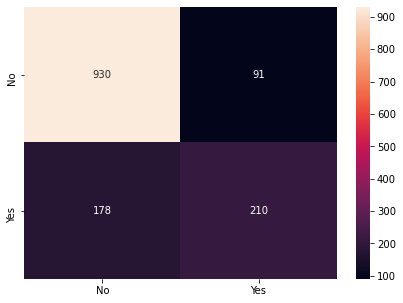

In [68]:
from sklearn.ensemble import BaggingClassifier

bgcl1 = BaggingClassifier(base_estimator=logreg, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgc = bgcl1.fit(X_resampled, y_resampled)
y_predict1 = bgcl.predict(X_test)

print(accuracy_score(y_test,y_predict1))

cm=confusion_matrix(y_test, y_predict1,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Using logistic regression as base estimator in bagging classifier

# Ensemble Bagging - RandomForest Classifier

RandomForest for target balanced data

0.7757274662881476


<AxesSubplot:>

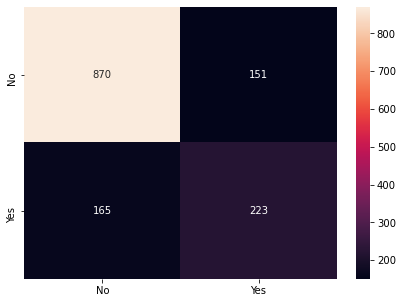

In [69]:

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfc = rfcl.fit(X_resampled, y_resampled)
y_predict = rfcl.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.7806955287437899


<AxesSubplot:>

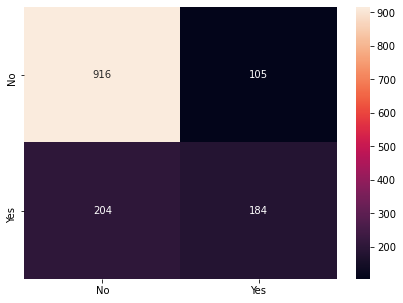

In [70]:
rfcl1 = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfc1 = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Resampled data -ensemble technique

0.7757274662881476


<AxesSubplot:>

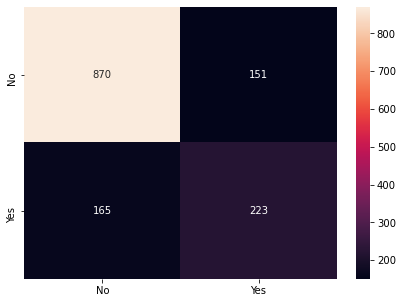

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfcl1 = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfc1 = rfcl1.fit(X_resampled, y_resampled)
y_predict = rfcl1.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

0.7508871540099361


<AxesSubplot:>

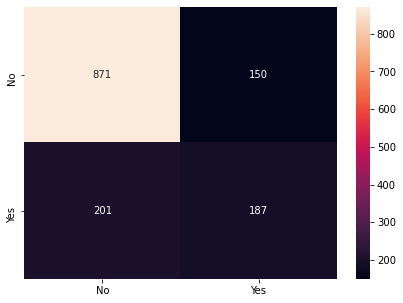

In [72]:

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

abc = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(accuracy_score(y_test,y_predict))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Resampled data-Adaboost

0.7466288147622427


<AxesSubplot:>

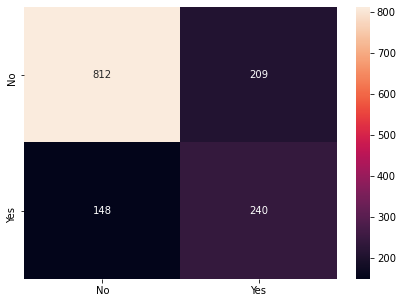

In [74]:
from sklearn.ensemble import AdaBoostClassifier
abcl1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abc1 = abcl1.fit(X_resampled, y_resampled)
y_predict = abcl1.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - GradientBoost

0.8097941802696949


<AxesSubplot:>

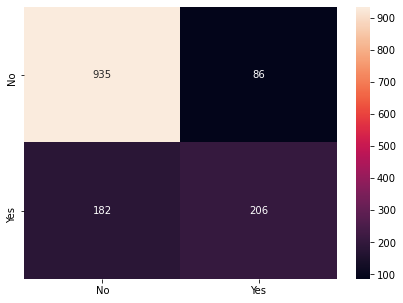

In [75]:

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbc = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Resampled data-Gradientboost

0.765791341376863


<AxesSubplot:>

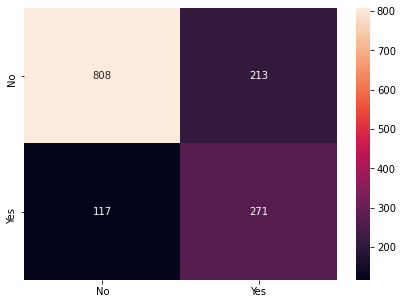

In [76]:
# from sklearn.ensemble import GradientBoostingClassifier
gbcl1 = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbc1 = gbcl1.fit(X_resampled, y_resampled)
y_predict = gbcl1.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - XGBoost

0.7835344215755855


<AxesSubplot:>

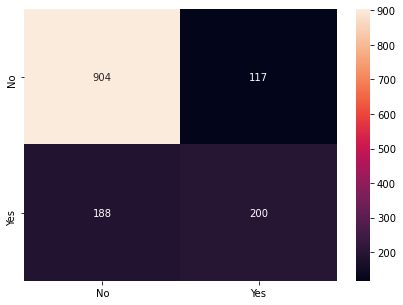

In [77]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective='binary:logistic',eval_metric='error')
x= xg.fit(X_train, y_train)
y_predict = xg.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Resampled data-XGboost

0.7700496806245565


<AxesSubplot:>

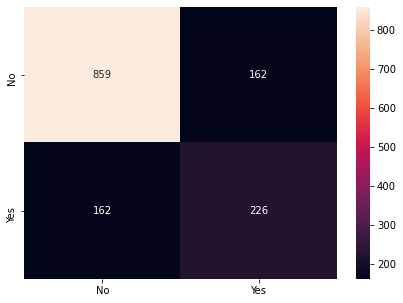

In [78]:
import xgboost as xgb
xg1 = xgb.XGBClassifier(objective='binary:logistic',eval_metric='error')
x1 = xg1.fit(X_resampled, y_resampled)
y_predict = xg1.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - catBoost

In [79]:
from catboost import CatBoostClassifier 

Learning rate set to 0.021554
0:	learn: 0.6777363	total: 165ms	remaining: 2m 44s
1:	learn: 0.6654777	total: 174ms	remaining: 1m 26s
2:	learn: 0.6526056	total: 181ms	remaining: 1m
3:	learn: 0.6406093	total: 187ms	remaining: 46.7s
4:	learn: 0.6298603	total: 195ms	remaining: 38.7s
5:	learn: 0.6180811	total: 201ms	remaining: 33.3s
6:	learn: 0.6086487	total: 209ms	remaining: 29.6s
7:	learn: 0.5988508	total: 215ms	remaining: 26.6s
8:	learn: 0.5904132	total: 222ms	remaining: 24.4s
9:	learn: 0.5810974	total: 228ms	remaining: 22.6s
10:	learn: 0.5724660	total: 235ms	remaining: 21.1s
11:	learn: 0.5644488	total: 242ms	remaining: 19.9s
12:	learn: 0.5574906	total: 248ms	remaining: 18.9s
13:	learn: 0.5506803	total: 255ms	remaining: 18s
14:	learn: 0.5440153	total: 261ms	remaining: 17.2s
15:	learn: 0.5382549	total: 268ms	remaining: 16.5s
16:	learn: 0.5314866	total: 275ms	remaining: 15.9s
17:	learn: 0.5263275	total: 281ms	remaining: 15.3s
18:	learn: 0.5211178	total: 288ms	remaining: 14.9s
19:	learn: 0.5

166:	learn: 0.3881119	total: 1.49s	remaining: 7.44s
167:	learn: 0.3879809	total: 1.51s	remaining: 7.46s
168:	learn: 0.3877072	total: 1.51s	remaining: 7.45s
169:	learn: 0.3875620	total: 1.52s	remaining: 7.43s
170:	learn: 0.3873157	total: 1.53s	remaining: 7.42s
171:	learn: 0.3871007	total: 1.54s	remaining: 7.4s
172:	learn: 0.3869542	total: 1.54s	remaining: 7.39s
173:	learn: 0.3867368	total: 1.55s	remaining: 7.37s
174:	learn: 0.3864923	total: 1.56s	remaining: 7.35s
175:	learn: 0.3863276	total: 1.57s	remaining: 7.33s
176:	learn: 0.3861891	total: 1.57s	remaining: 7.32s
177:	learn: 0.3860610	total: 1.58s	remaining: 7.3s
178:	learn: 0.3859619	total: 1.59s	remaining: 7.29s
179:	learn: 0.3857532	total: 1.6s	remaining: 7.27s
180:	learn: 0.3855652	total: 1.6s	remaining: 7.26s
181:	learn: 0.3854667	total: 1.61s	remaining: 7.24s
182:	learn: 0.3853432	total: 1.62s	remaining: 7.22s
183:	learn: 0.3851375	total: 1.63s	remaining: 7.21s
184:	learn: 0.3849962	total: 1.63s	remaining: 7.19s
185:	learn: 0.38

334:	learn: 0.3641391	total: 2.63s	remaining: 5.21s
335:	learn: 0.3640657	total: 2.63s	remaining: 5.2s
336:	learn: 0.3639334	total: 2.64s	remaining: 5.19s
337:	learn: 0.3637304	total: 2.64s	remaining: 5.18s
338:	learn: 0.3636670	total: 2.65s	remaining: 5.17s
339:	learn: 0.3636322	total: 2.65s	remaining: 5.15s
340:	learn: 0.3635990	total: 2.66s	remaining: 5.14s
341:	learn: 0.3634672	total: 2.67s	remaining: 5.13s
342:	learn: 0.3633952	total: 2.67s	remaining: 5.12s
343:	learn: 0.3632207	total: 2.68s	remaining: 5.11s
344:	learn: 0.3629960	total: 2.68s	remaining: 5.09s
345:	learn: 0.3628793	total: 2.69s	remaining: 5.08s
346:	learn: 0.3627654	total: 2.69s	remaining: 5.07s
347:	learn: 0.3626224	total: 2.7s	remaining: 5.06s
348:	learn: 0.3625251	total: 2.71s	remaining: 5.05s
349:	learn: 0.3624097	total: 2.71s	remaining: 5.04s
350:	learn: 0.3622686	total: 2.72s	remaining: 5.02s
351:	learn: 0.3621150	total: 2.72s	remaining: 5.01s
352:	learn: 0.3620142	total: 2.73s	remaining: 5s
353:	learn: 0.361

510:	learn: 0.3428593	total: 3.76s	remaining: 3.59s
511:	learn: 0.3427099	total: 3.76s	remaining: 3.59s
512:	learn: 0.3426554	total: 3.78s	remaining: 3.59s
513:	learn: 0.3425207	total: 3.79s	remaining: 3.58s
514:	learn: 0.3424216	total: 3.8s	remaining: 3.58s
515:	learn: 0.3423463	total: 3.8s	remaining: 3.57s
516:	learn: 0.3421942	total: 3.81s	remaining: 3.56s
517:	learn: 0.3420823	total: 3.82s	remaining: 3.55s
518:	learn: 0.3419613	total: 3.83s	remaining: 3.54s
519:	learn: 0.3418160	total: 3.83s	remaining: 3.54s
520:	learn: 0.3416272	total: 3.84s	remaining: 3.53s
521:	learn: 0.3414799	total: 3.85s	remaining: 3.52s
522:	learn: 0.3414395	total: 3.85s	remaining: 3.52s
523:	learn: 0.3412431	total: 3.86s	remaining: 3.51s
524:	learn: 0.3411341	total: 3.87s	remaining: 3.5s
525:	learn: 0.3409947	total: 3.88s	remaining: 3.49s
526:	learn: 0.3408212	total: 3.88s	remaining: 3.48s
527:	learn: 0.3406726	total: 3.89s	remaining: 3.48s
528:	learn: 0.3405715	total: 3.9s	remaining: 3.47s
529:	learn: 0.34

692:	learn: 0.3227177	total: 5.05s	remaining: 2.24s
693:	learn: 0.3226258	total: 5.06s	remaining: 2.23s
694:	learn: 0.3225496	total: 5.07s	remaining: 2.23s
695:	learn: 0.3224145	total: 5.08s	remaining: 2.22s
696:	learn: 0.3222884	total: 5.08s	remaining: 2.21s
697:	learn: 0.3221325	total: 5.09s	remaining: 2.2s
698:	learn: 0.3220884	total: 5.1s	remaining: 2.2s
699:	learn: 0.3220014	total: 5.11s	remaining: 2.19s
700:	learn: 0.3218906	total: 5.11s	remaining: 2.18s
701:	learn: 0.3218189	total: 5.12s	remaining: 2.17s
702:	learn: 0.3216526	total: 5.12s	remaining: 2.16s
703:	learn: 0.3216013	total: 5.13s	remaining: 2.16s
704:	learn: 0.3214801	total: 5.13s	remaining: 2.15s
705:	learn: 0.3214326	total: 5.14s	remaining: 2.14s
706:	learn: 0.3213535	total: 5.16s	remaining: 2.14s
707:	learn: 0.3212433	total: 5.17s	remaining: 2.13s
708:	learn: 0.3211057	total: 5.17s	remaining: 2.12s
709:	learn: 0.3209769	total: 5.18s	remaining: 2.12s
710:	learn: 0.3209011	total: 5.18s	remaining: 2.11s
711:	learn: 0.3

865:	learn: 0.3056838	total: 6.17s	remaining: 955ms
866:	learn: 0.3056054	total: 6.17s	remaining: 947ms
867:	learn: 0.3055379	total: 6.18s	remaining: 940ms
868:	learn: 0.3054629	total: 6.19s	remaining: 933ms
869:	learn: 0.3054251	total: 6.2s	remaining: 926ms
870:	learn: 0.3053701	total: 6.2s	remaining: 919ms
871:	learn: 0.3052632	total: 6.21s	remaining: 912ms
872:	learn: 0.3051678	total: 6.22s	remaining: 904ms
873:	learn: 0.3050702	total: 6.23s	remaining: 899ms
874:	learn: 0.3050015	total: 6.24s	remaining: 891ms
875:	learn: 0.3048981	total: 6.25s	remaining: 884ms
876:	learn: 0.3047951	total: 6.25s	remaining: 877ms
877:	learn: 0.3047280	total: 6.26s	remaining: 869ms
878:	learn: 0.3046916	total: 6.26s	remaining: 862ms
879:	learn: 0.3045876	total: 6.27s	remaining: 855ms
880:	learn: 0.3045058	total: 6.28s	remaining: 848ms
881:	learn: 0.3044412	total: 6.28s	remaining: 841ms
882:	learn: 0.3043381	total: 6.29s	remaining: 833ms
883:	learn: 0.3042063	total: 6.3s	remaining: 826ms
884:	learn: 0.3

<AxesSubplot:>

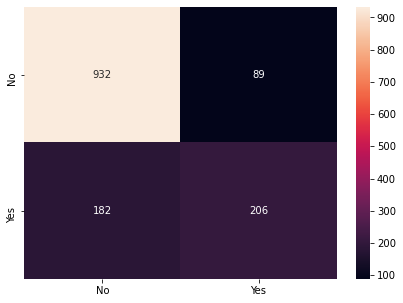

In [80]:
cb = CatBoostClassifier()
c = cb.fit(X_train, y_train)
y_predict = cb.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Resampled data-catboost

Learning rate set to 0.02544
0:	learn: 0.6772367	total: 7.41ms	remaining: 7.41s
1:	learn: 0.6623147	total: 14.7ms	remaining: 7.36s
2:	learn: 0.6485894	total: 22.3ms	remaining: 7.42s
3:	learn: 0.6350692	total: 29.8ms	remaining: 7.41s
4:	learn: 0.6231749	total: 37.1ms	remaining: 7.39s
5:	learn: 0.6122820	total: 49.2ms	remaining: 8.15s
6:	learn: 0.6017335	total: 56.5ms	remaining: 8.02s
7:	learn: 0.5912393	total: 64.2ms	remaining: 7.96s
8:	learn: 0.5818622	total: 71.8ms	remaining: 7.91s
9:	learn: 0.5741845	total: 80.1ms	remaining: 7.93s
10:	learn: 0.5670892	total: 87.1ms	remaining: 7.83s
11:	learn: 0.5589842	total: 94.5ms	remaining: 7.78s
12:	learn: 0.5514181	total: 102ms	remaining: 7.75s
13:	learn: 0.5443477	total: 110ms	remaining: 7.72s
14:	learn: 0.5388501	total: 117ms	remaining: 7.66s
15:	learn: 0.5324594	total: 124ms	remaining: 7.65s
16:	learn: 0.5265639	total: 132ms	remaining: 7.62s
17:	learn: 0.5213001	total: 139ms	remaining: 7.57s
18:	learn: 0.5158024	total: 147ms	remaining: 7.58s


162:	learn: 0.3612513	total: 1.31s	remaining: 6.72s
163:	learn: 0.3609652	total: 1.32s	remaining: 6.71s
164:	learn: 0.3607486	total: 1.34s	remaining: 6.78s
165:	learn: 0.3604521	total: 1.35s	remaining: 6.77s
166:	learn: 0.3601814	total: 1.35s	remaining: 6.76s
167:	learn: 0.3600342	total: 1.36s	remaining: 6.75s
168:	learn: 0.3597793	total: 1.37s	remaining: 6.74s
169:	learn: 0.3595904	total: 1.38s	remaining: 6.73s
170:	learn: 0.3592731	total: 1.39s	remaining: 6.71s
171:	learn: 0.3590163	total: 1.39s	remaining: 6.71s
172:	learn: 0.3587409	total: 1.4s	remaining: 6.69s
173:	learn: 0.3585462	total: 1.41s	remaining: 6.68s
174:	learn: 0.3582361	total: 1.42s	remaining: 6.67s
175:	learn: 0.3578732	total: 1.42s	remaining: 6.66s
176:	learn: 0.3575473	total: 1.43s	remaining: 6.65s
177:	learn: 0.3571617	total: 1.44s	remaining: 6.64s
178:	learn: 0.3569277	total: 1.44s	remaining: 6.62s
179:	learn: 0.3565138	total: 1.45s	remaining: 6.61s
180:	learn: 0.3562027	total: 1.46s	remaining: 6.6s
181:	learn: 0.

334:	learn: 0.3247142	total: 2.61s	remaining: 5.18s
335:	learn: 0.3245804	total: 2.62s	remaining: 5.17s
336:	learn: 0.3244223	total: 2.62s	remaining: 5.16s
337:	learn: 0.3242682	total: 2.63s	remaining: 5.15s
338:	learn: 0.3241388	total: 2.64s	remaining: 5.14s
339:	learn: 0.3239929	total: 2.64s	remaining: 5.13s
340:	learn: 0.3238418	total: 2.65s	remaining: 5.13s
341:	learn: 0.3236331	total: 2.66s	remaining: 5.12s
342:	learn: 0.3235052	total: 2.67s	remaining: 5.11s
343:	learn: 0.3232950	total: 2.67s	remaining: 5.1s
344:	learn: 0.3231387	total: 2.68s	remaining: 5.09s
345:	learn: 0.3229981	total: 2.69s	remaining: 5.08s
346:	learn: 0.3226852	total: 2.7s	remaining: 5.08s
347:	learn: 0.3225550	total: 2.71s	remaining: 5.07s
348:	learn: 0.3224390	total: 2.71s	remaining: 5.06s
349:	learn: 0.3222340	total: 2.72s	remaining: 5.05s
350:	learn: 0.3220662	total: 2.73s	remaining: 5.04s
351:	learn: 0.3219114	total: 2.73s	remaining: 5.04s
352:	learn: 0.3216748	total: 2.74s	remaining: 5.03s
353:	learn: 0.

502:	learn: 0.2957622	total: 3.91s	remaining: 3.87s
503:	learn: 0.2956134	total: 3.92s	remaining: 3.86s
504:	learn: 0.2954099	total: 3.94s	remaining: 3.86s
505:	learn: 0.2952140	total: 3.95s	remaining: 3.85s
506:	learn: 0.2950048	total: 3.96s	remaining: 3.85s
507:	learn: 0.2948993	total: 3.96s	remaining: 3.84s
508:	learn: 0.2947399	total: 3.97s	remaining: 3.83s
509:	learn: 0.2946214	total: 3.98s	remaining: 3.82s
510:	learn: 0.2944686	total: 3.98s	remaining: 3.81s
511:	learn: 0.2943635	total: 3.99s	remaining: 3.81s
512:	learn: 0.2942457	total: 4s	remaining: 3.8s
513:	learn: 0.2941196	total: 4.01s	remaining: 3.79s
514:	learn: 0.2939791	total: 4.01s	remaining: 3.78s
515:	learn: 0.2937958	total: 4.02s	remaining: 3.77s
516:	learn: 0.2936450	total: 4.03s	remaining: 3.76s
517:	learn: 0.2934915	total: 4.04s	remaining: 3.75s
518:	learn: 0.2933742	total: 4.04s	remaining: 3.75s
519:	learn: 0.2932034	total: 4.05s	remaining: 3.74s
520:	learn: 0.2930411	total: 4.06s	remaining: 3.73s
521:	learn: 0.29

668:	learn: 0.2736701	total: 5.2s	remaining: 2.57s
669:	learn: 0.2736004	total: 5.2s	remaining: 2.56s
670:	learn: 0.2735181	total: 5.21s	remaining: 2.56s
671:	learn: 0.2733420	total: 5.22s	remaining: 2.55s
672:	learn: 0.2731765	total: 5.23s	remaining: 2.54s
673:	learn: 0.2730014	total: 5.24s	remaining: 2.53s
674:	learn: 0.2728828	total: 5.24s	remaining: 2.52s
675:	learn: 0.2727225	total: 5.25s	remaining: 2.52s
676:	learn: 0.2725613	total: 5.26s	remaining: 2.51s
677:	learn: 0.2724589	total: 5.27s	remaining: 2.5s
678:	learn: 0.2723358	total: 5.27s	remaining: 2.49s
679:	learn: 0.2722657	total: 5.28s	remaining: 2.48s
680:	learn: 0.2721065	total: 5.29s	remaining: 2.48s
681:	learn: 0.2720141	total: 5.3s	remaining: 2.47s
682:	learn: 0.2718903	total: 5.3s	remaining: 2.46s
683:	learn: 0.2717399	total: 5.31s	remaining: 2.45s
684:	learn: 0.2716143	total: 5.32s	remaining: 2.45s
685:	learn: 0.2715199	total: 5.33s	remaining: 2.44s
686:	learn: 0.2713915	total: 5.33s	remaining: 2.43s
687:	learn: 0.271

839:	learn: 0.2553985	total: 6.53s	remaining: 1.24s
840:	learn: 0.2552804	total: 6.53s	remaining: 1.24s
841:	learn: 0.2551689	total: 6.54s	remaining: 1.23s
842:	learn: 0.2550834	total: 6.55s	remaining: 1.22s
843:	learn: 0.2549647	total: 6.56s	remaining: 1.21s
844:	learn: 0.2549010	total: 6.57s	remaining: 1.2s
845:	learn: 0.2547956	total: 6.58s	remaining: 1.2s
846:	learn: 0.2546909	total: 6.58s	remaining: 1.19s
847:	learn: 0.2545884	total: 6.59s	remaining: 1.18s
848:	learn: 0.2545263	total: 6.6s	remaining: 1.17s
849:	learn: 0.2544301	total: 6.61s	remaining: 1.17s
850:	learn: 0.2542812	total: 6.61s	remaining: 1.16s
851:	learn: 0.2541587	total: 6.62s	remaining: 1.15s
852:	learn: 0.2539696	total: 6.63s	remaining: 1.14s
853:	learn: 0.2538705	total: 6.63s	remaining: 1.13s
854:	learn: 0.2537444	total: 6.64s	remaining: 1.13s
855:	learn: 0.2536335	total: 6.65s	remaining: 1.12s
856:	learn: 0.2534956	total: 6.66s	remaining: 1.11s
857:	learn: 0.2533651	total: 6.66s	remaining: 1.1s
858:	learn: 0.25

<AxesSubplot:>

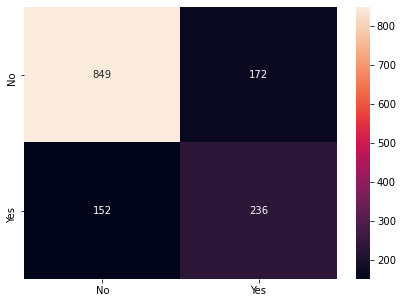

In [81]:
cb = CatBoostClassifier()
c1= cb.fit(X_resampled, y_resampled)
y_predict = cb.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - lightGBM

In [82]:
from lightgbm import LGBMClassifier 

0.7906316536550745


<AxesSubplot:>

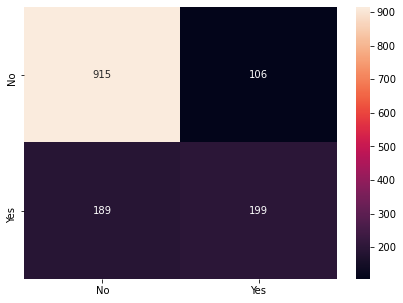

In [83]:
lg = LGBMClassifier ()
l = lg.fit(X_train, y_train)
y_predict = lg.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Resampled data-LightGBM

0.7707594038325053


<AxesSubplot:>

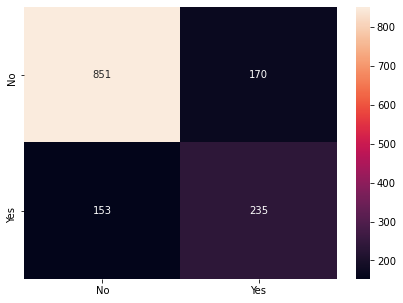

In [84]:
lg = LGBMClassifier ()
l1 = lg.fit(X_resampled, y_resampled)
y_predict = lg.predict(X_test)
print(accuracy_score(y_test,y_predict))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
ensemble_clf=[dTree,bgcl,rfcl,abcl,gbcl,xg,cb,lg] 

In [87]:
param1={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
param2={"n_estimators" :[100, 300, 500, 800, 1200],"max_samples":range(10,300,5)}
param3={"n_estimators":[100, 300, 500, 800, 1200],"max_depth":range(5,30,5),"min_samples_split":range(1,100,5),"min_samples_leaf":[1, 2, 5, 10]}
param4={'base_estimator__max_depth':[i for i in range(2,11,2)],'base_estimator__min_samples_leaf':[5,10],'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1]}
param5={'min_samples_split':range(200,1001,200),'min_samples_leaf':range(30,71,10),'max_depth':range(5,30,5),'learning_rate':[0.01,0.1,0.8,0.003,0.04]}
param6={'learning_rate':[0.1,0.8,0.01,0.03],'max_depth':range(5,16,2),'min_child_weight':range(1,6,2),'gamma':[0.1,0.5,0.01]}
param7={'learning_rate': [0.03, 0.1,0.2,0.5],'depth':range(5,16,2),'l2_leaf_reg': range(1,20,2)}
param8={'learning_rate': [0.03,0.5,0.1,0.01],'max_depth':range(5,20,5),'num_leaves': range(1,30,2)}
param=[param1,param2,param3,param4,param5,param6,param7,param8]
model_log=["_dTree", "_bgcl", "_rfcl", "_abcl","_gbcl","_xg","_cb","_lg"]























In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
for i in range(len(ensemble_clf)):
    ran=RandomizedSearchCV(estimator=ensemble_clf[i], param_distributions=param[i], 
                      n_jobs=-1, cv=3, verbose=3)
    ran.fit(X_train, y_train)
    globals()['Grid%s' % model_log[i]]=pd.DataFrame(ran.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.6728786	total: 26.4ms	remaining: 26.3s
1:	learn: 0.6536686	total: 36.7ms	remaining: 18.3s
2:	learn: 0.6366295	total: 44.7ms	remaining: 14.9s
3:	learn: 0.6201102	total: 52ms	remaining: 13s
4:	learn: 0.6058399	total: 57.9ms	remaining: 11.5s
5:	learn: 0.5930868	total: 63.8ms	remaining: 10.6s
6:	learn: 0.5817517	total: 69.2ms	remaining: 9.81s
7:	learn: 0.5709439	total: 74.3ms	remaining: 9.21s
8:	learn: 0.5601330	total: 79.3ms	remaining: 8.73s
9:	learn: 0.5500275	total: 83.7ms	remaining: 8.29s
10:	learn: 0.5412112	total: 89ms	remaining: 8s
11:	learn: 0.5328555

159:	learn: 0.3747244	total: 1.15s	remaining: 6.06s
160:	learn: 0.3745486	total: 1.16s	remaining: 6.06s
161:	learn: 0.3743967	total: 1.17s	remaining: 6.07s
162:	learn: 0.3743045	total: 1.18s	remaining: 6.07s
163:	learn: 0.3739607	total: 1.19s	remaining: 6.08s
164:	learn: 0.3737171	total: 1.2s	remaining: 6.08s
165:	learn: 0.3735122	total: 1.21s	remaining: 6.07s
166:	learn: 0.3732325	total: 1.21s	remaining: 6.06s
167:	learn: 0.3730470	total: 1.22s	remaining: 6.04s
168:	learn: 0.3727974	total: 1.22s	remaining: 6.02s
169:	learn: 0.3725940	total: 1.23s	remaining: 6.01s
170:	learn: 0.3723606	total: 1.24s	remaining: 6s
171:	learn: 0.3721714	total: 1.24s	remaining: 5.98s
172:	learn: 0.3720401	total: 1.25s	remaining: 5.97s
173:	learn: 0.3718577	total: 1.25s	remaining: 5.96s
174:	learn: 0.3718438	total: 1.26s	remaining: 5.94s
175:	learn: 0.3715984	total: 1.27s	remaining: 5.94s
176:	learn: 0.3714951	total: 1.28s	remaining: 5.93s
177:	learn: 0.3713169	total: 1.28s	remaining: 5.93s
178:	learn: 0.37

337:	learn: 0.3437004	total: 2.5s	remaining: 4.9s
338:	learn: 0.3436360	total: 2.51s	remaining: 4.89s
339:	learn: 0.3434874	total: 2.52s	remaining: 4.88s
340:	learn: 0.3433444	total: 2.52s	remaining: 4.87s
341:	learn: 0.3432213	total: 2.53s	remaining: 4.87s
342:	learn: 0.3430752	total: 2.53s	remaining: 4.86s
343:	learn: 0.3428856	total: 2.54s	remaining: 4.84s
344:	learn: 0.3427136	total: 2.56s	remaining: 4.87s
345:	learn: 0.3425331	total: 2.58s	remaining: 4.87s
346:	learn: 0.3424052	total: 2.58s	remaining: 4.86s
347:	learn: 0.3422937	total: 2.59s	remaining: 4.86s
348:	learn: 0.3422038	total: 2.6s	remaining: 4.85s
349:	learn: 0.3420649	total: 2.61s	remaining: 4.84s
350:	learn: 0.3419186	total: 2.62s	remaining: 4.84s
351:	learn: 0.3417648	total: 2.63s	remaining: 4.83s
352:	learn: 0.3415732	total: 2.63s	remaining: 4.83s
353:	learn: 0.3414878	total: 2.64s	remaining: 4.83s
354:	learn: 0.3413709	total: 2.65s	remaining: 4.82s
355:	learn: 0.3412720	total: 2.66s	remaining: 4.82s
356:	learn: 0.3

507:	learn: 0.3229756	total: 4.04s	remaining: 3.92s
508:	learn: 0.3227939	total: 4.05s	remaining: 3.91s
509:	learn: 0.3227311	total: 4.06s	remaining: 3.9s
510:	learn: 0.3225534	total: 4.07s	remaining: 3.89s
511:	learn: 0.3224889	total: 4.08s	remaining: 3.89s
512:	learn: 0.3223993	total: 4.09s	remaining: 3.88s
513:	learn: 0.3222518	total: 4.1s	remaining: 3.87s
514:	learn: 0.3221255	total: 4.11s	remaining: 3.87s
515:	learn: 0.3218982	total: 4.11s	remaining: 3.86s
516:	learn: 0.3218368	total: 4.12s	remaining: 3.85s
517:	learn: 0.3216904	total: 4.12s	remaining: 3.84s
518:	learn: 0.3215837	total: 4.13s	remaining: 3.83s
519:	learn: 0.3214997	total: 4.14s	remaining: 3.82s
520:	learn: 0.3213299	total: 4.14s	remaining: 3.81s
521:	learn: 0.3212645	total: 4.15s	remaining: 3.8s
522:	learn: 0.3212171	total: 4.15s	remaining: 3.79s
523:	learn: 0.3211562	total: 4.16s	remaining: 3.78s
524:	learn: 0.3210620	total: 4.16s	remaining: 3.77s
525:	learn: 0.3210020	total: 4.17s	remaining: 3.76s
526:	learn: 0.3

684:	learn: 0.3037811	total: 5.56s	remaining: 2.56s
685:	learn: 0.3037403	total: 5.57s	remaining: 2.55s
686:	learn: 0.3035930	total: 5.6s	remaining: 2.55s
687:	learn: 0.3035330	total: 5.61s	remaining: 2.54s
688:	learn: 0.3035151	total: 5.62s	remaining: 2.54s
689:	learn: 0.3034180	total: 5.63s	remaining: 2.53s
690:	learn: 0.3032836	total: 5.64s	remaining: 2.52s
691:	learn: 0.3032229	total: 5.65s	remaining: 2.51s
692:	learn: 0.3031424	total: 5.65s	remaining: 2.5s
693:	learn: 0.3030646	total: 5.66s	remaining: 2.5s
694:	learn: 0.3029774	total: 5.67s	remaining: 2.49s
695:	learn: 0.3028826	total: 5.68s	remaining: 2.48s
696:	learn: 0.3028644	total: 5.69s	remaining: 2.47s
697:	learn: 0.3028545	total: 5.7s	remaining: 2.46s
698:	learn: 0.3026416	total: 5.71s	remaining: 2.46s
699:	learn: 0.3024583	total: 5.72s	remaining: 2.45s
700:	learn: 0.3024504	total: 5.72s	remaining: 2.44s
701:	learn: 0.3023782	total: 5.73s	remaining: 2.43s
702:	learn: 0.3022976	total: 5.74s	remaining: 2.43s
703:	learn: 0.30

847:	learn: 0.2886237	total: 6.88s	remaining: 1.23s
848:	learn: 0.2884990	total: 6.89s	remaining: 1.22s
849:	learn: 0.2884376	total: 6.89s	remaining: 1.22s
850:	learn: 0.2883384	total: 6.9s	remaining: 1.21s
851:	learn: 0.2881487	total: 6.91s	remaining: 1.2s
852:	learn: 0.2879961	total: 6.92s	remaining: 1.19s
853:	learn: 0.2879053	total: 6.93s	remaining: 1.18s
854:	learn: 0.2877553	total: 6.94s	remaining: 1.18s
855:	learn: 0.2876484	total: 6.95s	remaining: 1.17s
856:	learn: 0.2875828	total: 6.96s	remaining: 1.16s
857:	learn: 0.2875502	total: 6.96s	remaining: 1.15s
858:	learn: 0.2874989	total: 6.97s	remaining: 1.14s
859:	learn: 0.2874672	total: 6.99s	remaining: 1.14s
860:	learn: 0.2874342	total: 7s	remaining: 1.13s
861:	learn: 0.2873771	total: 7.01s	remaining: 1.12s
862:	learn: 0.2873110	total: 7.01s	remaining: 1.11s
863:	learn: 0.2871348	total: 7.02s	remaining: 1.1s
864:	learn: 0.2870156	total: 7.05s	remaining: 1.1s
865:	learn: 0.2868746	total: 7.1s	remaining: 1.1s
866:	learn: 0.2867651

In [90]:
print(ran.best_estimator_) #getting best estimator using randomsearchcv
print(ran.best_params_)
print(ran.best_score_)

LGBMClassifier(learning_rate=0.03, max_depth=5, num_leaves=5)
{'num_leaves': 5, 'max_depth': 5, 'learning_rate': 0.03}
0.7974795882144124


In [91]:
for i in range(len(ensemble_clf)):
    ran=RandomizedSearchCV(estimator=ensemble_clf[i], param_distributions=param[i], 
                      n_jobs=-1, cv=3, verbose=3)
    ran.fit(X_resampled, y_resampled)
    globals()['Grid%s' % model_log[i]]=pd.DataFrame(ran.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.5856943	total: 22.7ms	remaining: 22.6s
1:	learn: 0.5265313	total: 31.2ms	remaining: 15.5s
2:	learn: 0.4863040	total: 36.1ms	remaining: 12s
3:	learn: 0.4587738	total: 41.3ms	remaining: 10.3s
4:	learn: 0.4367787	total: 46.8ms	remaining: 9.32s
5:	learn: 0.4207883	total: 52.2ms	remaining: 8.65s
6:	learn: 0.4087996	total: 63.4ms	remaining: 8.99s
7:	learn: 0.3996892	total: 88.4ms	remaining: 11s
8:	learn: 0.3930289	total: 95ms	remaining: 10.5s
9:	learn: 0.3878230	total: 103ms	remaining: 10.2s
10:	learn: 0.3831111	total: 109ms	remaining: 9.78s
11:	learn: 0.377871

160:	learn: 0.2067113	total: 1.57s	remaining: 8.19s
161:	learn: 0.2061702	total: 1.58s	remaining: 8.18s
162:	learn: 0.2054484	total: 1.59s	remaining: 8.18s
163:	learn: 0.2050299	total: 1.6s	remaining: 8.17s
164:	learn: 0.2049078	total: 1.62s	remaining: 8.18s
165:	learn: 0.2042402	total: 1.63s	remaining: 8.17s
166:	learn: 0.2035693	total: 1.64s	remaining: 8.17s
167:	learn: 0.2032396	total: 1.65s	remaining: 8.16s
168:	learn: 0.2028480	total: 1.66s	remaining: 8.16s
169:	learn: 0.2025699	total: 1.67s	remaining: 8.15s
170:	learn: 0.2017134	total: 1.68s	remaining: 8.14s
171:	learn: 0.2013398	total: 1.69s	remaining: 8.13s
172:	learn: 0.2009818	total: 1.71s	remaining: 8.2s
173:	learn: 0.2008594	total: 1.72s	remaining: 8.19s
174:	learn: 0.2005439	total: 1.74s	remaining: 8.18s
175:	learn: 0.2002417	total: 1.75s	remaining: 8.17s
176:	learn: 0.1996163	total: 1.76s	remaining: 8.17s
177:	learn: 0.1990022	total: 1.77s	remaining: 8.17s
178:	learn: 0.1986192	total: 1.78s	remaining: 8.16s
179:	learn: 0.

332:	learn: 0.1453201	total: 3.34s	remaining: 6.68s
333:	learn: 0.1449948	total: 3.35s	remaining: 6.67s
334:	learn: 0.1447163	total: 3.36s	remaining: 6.66s
335:	learn: 0.1444458	total: 3.37s	remaining: 6.65s
336:	learn: 0.1442044	total: 3.38s	remaining: 6.64s
337:	learn: 0.1440511	total: 3.39s	remaining: 6.64s
338:	learn: 0.1435006	total: 3.4s	remaining: 6.63s
339:	learn: 0.1434047	total: 3.41s	remaining: 6.62s
340:	learn: 0.1430895	total: 3.42s	remaining: 6.61s
341:	learn: 0.1428302	total: 3.43s	remaining: 6.6s
342:	learn: 0.1425827	total: 3.44s	remaining: 6.59s
343:	learn: 0.1424447	total: 3.45s	remaining: 6.58s
344:	learn: 0.1420634	total: 3.46s	remaining: 6.57s
345:	learn: 0.1418910	total: 3.47s	remaining: 6.56s
346:	learn: 0.1416118	total: 3.48s	remaining: 6.55s
347:	learn: 0.1415051	total: 3.49s	remaining: 6.54s
348:	learn: 0.1413638	total: 3.5s	remaining: 6.54s
349:	learn: 0.1412300	total: 3.52s	remaining: 6.53s
350:	learn: 0.1410263	total: 3.53s	remaining: 6.52s
351:	learn: 0.1

501:	learn: 0.1101150	total: 5.1s	remaining: 5.05s
502:	learn: 0.1099252	total: 5.11s	remaining: 5.05s
503:	learn: 0.1095840	total: 5.12s	remaining: 5.04s
504:	learn: 0.1094509	total: 5.13s	remaining: 5.03s
505:	learn: 0.1094095	total: 5.14s	remaining: 5.02s
506:	learn: 0.1092801	total: 5.15s	remaining: 5.01s
507:	learn: 0.1090856	total: 5.16s	remaining: 5s
508:	learn: 0.1089966	total: 5.17s	remaining: 4.99s
509:	learn: 0.1088259	total: 5.18s	remaining: 4.98s
510:	learn: 0.1087007	total: 5.19s	remaining: 4.97s
511:	learn: 0.1086185	total: 5.22s	remaining: 4.97s
512:	learn: 0.1084976	total: 5.23s	remaining: 4.96s
513:	learn: 0.1084300	total: 5.24s	remaining: 4.95s
514:	learn: 0.1082560	total: 5.25s	remaining: 4.94s
515:	learn: 0.1080438	total: 5.26s	remaining: 4.93s
516:	learn: 0.1079138	total: 5.27s	remaining: 4.92s
517:	learn: 0.1078303	total: 5.28s	remaining: 4.91s
518:	learn: 0.1076514	total: 5.29s	remaining: 4.9s
519:	learn: 0.1074909	total: 5.3s	remaining: 4.89s
520:	learn: 0.1074

670:	learn: 0.0884346	total: 6.82s	remaining: 3.34s
671:	learn: 0.0882294	total: 6.83s	remaining: 3.33s
672:	learn: 0.0881272	total: 6.84s	remaining: 3.32s
673:	learn: 0.0879958	total: 6.85s	remaining: 3.31s
674:	learn: 0.0879174	total: 6.86s	remaining: 3.3s
675:	learn: 0.0878162	total: 6.87s	remaining: 3.29s
676:	learn: 0.0877198	total: 6.88s	remaining: 3.28s
677:	learn: 0.0876313	total: 6.89s	remaining: 3.27s
678:	learn: 0.0874824	total: 6.9s	remaining: 3.26s
679:	learn: 0.0873435	total: 6.92s	remaining: 3.26s
680:	learn: 0.0872372	total: 6.93s	remaining: 3.25s
681:	learn: 0.0870347	total: 6.94s	remaining: 3.24s
682:	learn: 0.0869847	total: 6.95s	remaining: 3.23s
683:	learn: 0.0868789	total: 6.96s	remaining: 3.22s
684:	learn: 0.0867734	total: 6.97s	remaining: 3.21s
685:	learn: 0.0866877	total: 6.99s	remaining: 3.2s
686:	learn: 0.0865827	total: 7s	remaining: 3.19s
687:	learn: 0.0865029	total: 7.01s	remaining: 3.18s
688:	learn: 0.0863850	total: 7.02s	remaining: 3.17s
689:	learn: 0.0863

837:	learn: 0.0736924	total: 8.55s	remaining: 1.65s
838:	learn: 0.0736548	total: 8.56s	remaining: 1.64s
839:	learn: 0.0735803	total: 8.57s	remaining: 1.63s
840:	learn: 0.0735189	total: 8.58s	remaining: 1.62s
841:	learn: 0.0734444	total: 8.58s	remaining: 1.61s
842:	learn: 0.0733874	total: 8.59s	remaining: 1.6s
843:	learn: 0.0732721	total: 8.59s	remaining: 1.59s
844:	learn: 0.0731257	total: 8.6s	remaining: 1.58s
845:	learn: 0.0731013	total: 8.6s	remaining: 1.57s
846:	learn: 0.0730121	total: 8.61s	remaining: 1.55s
847:	learn: 0.0728782	total: 8.62s	remaining: 1.54s
848:	learn: 0.0727940	total: 8.62s	remaining: 1.53s
849:	learn: 0.0727197	total: 8.63s	remaining: 1.52s
850:	learn: 0.0726809	total: 8.63s	remaining: 1.51s
851:	learn: 0.0725608	total: 8.64s	remaining: 1.5s
852:	learn: 0.0724892	total: 8.65s	remaining: 1.49s
853:	learn: 0.0724547	total: 8.66s	remaining: 1.48s
854:	learn: 0.0722868	total: 8.67s	remaining: 1.47s
855:	learn: 0.0722144	total: 8.68s	remaining: 1.46s
856:	learn: 0.07

In [92]:
print(ran.best_estimator_)
print(ran.best_params_)
print(ran.best_score_)

LGBMClassifier(learning_rate=0.5, max_depth=15, num_leaves=19)
{'num_leaves': 19, 'max_depth': 15, 'learning_rate': 0.5}
0.8042474189537203


Conclusions:
    Best ensemble algorithm is light GBM giving accuracy of 80% for target balanced data.
    